# ! Notebook in development !

In [ ]:
1 - notebook inline
2 - pipeline 1deg2
3 - pipeline 20deg2

In [2]:
import os
from pprint import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ceci
import h5py
import yaml

Make sure to change your path in the next cell that leads to your TXPipe directory. See examples for IN2P3 and NERSC below.

In [3]:
#user specific paths -- IN2P3 example
my_txpipe_dir = "/pbs/home/m/mricci/throng_mricci/desc/TXPipe"

#user specific paths -- NERSC example
#my_txpipe_dir = "/pscratch/sd/a/avestruz/TXPipe"

os.chdir(my_txpipe_dir)

import txpipe

# Let's start working with the 1deg2 data file on Jupyter

First we will do some runs on the 1 deg^2 example data set with around 80k galaxies. This is small enough that we can do it all in jupyter.

The data set, which is based on CosmoDC2, contains pre-computed photo-z and and contains a RedMapper cluster catalog for the field.

In [6]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterEnsembleProfiles.config_options)

pip_stage = txpipe.extensions.CLClusterEnsembleProfiles.make_stage(
    #cluster_catalog="./data/example/inputs/cluster_catalog.hdf5",
    cluster_shear_catalogs="./data/cosmodc2/outputs-1deg2-CL/cluster_shear_catalogs.hdf5",
    fiducial_cosmology="./data/fiducial_cosmology.yml",
    cluster_catalog_tomography="./data/cosmodc2/outputs-1deg2-CL/cluster_catalog_tomography.hdf5",
    

    # This is the output for this stage
    cluster_profiles="./data/cosmodc2/outputs-1deg2-CL/cluster_profiles.pkl",

    # This contains all the options for this stage. You can override them here, as we do with the max_radius below.
    config="./examples/cosmodc2/config-1deg2-CL.yml",    

)



Options for this pipeline and their defaults:
{'r_min': 0.2, 'r_max': 3.0, 'nbins': 5, 'delta_sigma_profile': True, 'shear_profile': False, 'magnification_profile': False}


In [7]:
print("Actual options used for this pipeline (as defined in config file or default):")
print(pip_stage.config)

Actual options used for this pipeline (as defined in config file or default):
{r_min:0.3,r_max:3.0,nbins:4,delta_sigma_profile:True,shear_profile:False,magnification_profile:False,cluster_shear_catalogs:./data/cosmodc2/outputs-1deg2-CL/cluster_shear_catalogs.hdf5,fiducial_cosmology:./data/fiducial_cosmology.yml,cluster_catalog_tomography:./data/cosmodc2/outputs-1deg2-CL/cluster_catalog_tomography.hdf5,cluster_profiles:./data/cosmodc2/outputs-1deg2-CL/cluster_profiles.pkl,config:./examples/cosmodc2/config-1deg2-CL.yml,aliases:{},}


In [15]:
pip_stage.run()
pip_stage.finalize()

[0.3        0.53348382 0.9486833  1.68702398 3.        ]
65968 65968 65968
bin_zbin_0_richbin_0 <HDF5 group "/cluster_bin/bin_zbin_0_richbin_0" (8 members)> 5
theta_max 13.683330543251138 = 3.2290998265188118 Mpc
GCData
> defined by: cosmo='CCLCosmology(H0=71.0, Omega_dm0=0.2199999, Omega_b0=0.0448, Omega_k0=0.0)', bin_units='Mpc'
> with columns: radius_min, radius, radius_max, tangential_comp, tangential_comp_err, cross_comp, cross_comp_err, z, z_err, n_src, W_l
> 4 objects
     radius_min           radius           radius_max     ... z_err n_src  W_l 
------------------- ------------------ ------------------ ... ----- ----- -----
0.29999999999999993 0.4258387859012772 0.5334838230116767 ...   0.0    24  24.0
 0.5334838230116767 0.7490677650809866 0.9486832980505137 ...   0.0    59  59.0
 0.9486832980505137 1.3484152213058525  1.687023975571047 ...   0.0   161 161.0
  1.687023975571047 2.3924501130602525                3.0 ...   0.0   564 564.0
theta_max 12.040790270002116 = 2.6702079

In [16]:
import pickle as pkl

In [26]:
pip_stage.config['cluster_profiles']

'./data/cosmodc2/outputs-1deg2-CL/cluster_profiles.pkl'

In [27]:
data = pkl.load(open(pip_stage.config['cluster_profiles'],"rb"))

In [28]:
data

{'bin_zbin_0_richbin_0': <clmm.clusterensemble.ClusterEnsemble at 0x7fd700a0b0d0>,
 'bin_zbin_0_richbin_1': <clmm.clusterensemble.ClusterEnsemble at 0x7fd7008e5cc0>,
 'bin_zbin_0_richbin_2': None,
 'bin_zbin_1_richbin_0': <clmm.clusterensemble.ClusterEnsemble at 0x7fd7008e4730>,
 'bin_zbin_1_richbin_1': <clmm.clusterensemble.ClusterEnsemble at 0x7fd7008e6b30>,
 'bin_zbin_1_richbin_2': None,
 'bin_zbin_2_richbin_0': <clmm.clusterensemble.ClusterEnsemble at 0x7fd7008e6cb0>,
 'bin_zbin_2_richbin_1': <clmm.clusterensemble.ClusterEnsemble at 0x7fd7008e6e30>,
 'bin_zbin_2_richbin_2': <clmm.clusterensemble.ClusterEnsemble at 0x7fd7008e6ec0>}

In [29]:
def plot_stacked_delta_sigma_profile(cl_stacked_data, title=None, ax=None):
    if ax==None:
        ax = plt.axes()

    ax.semilogx(cl_stacked_data.stacked_data['radius'],cl_stacked_data.stacked_data['tangential_comp'],'bx-',label="tan")
    ax.semilogx(cl_stacked_data.stacked_data['radius'],cl_stacked_data.stacked_data['cross_comp'],'ro-',label="cross")

    ax.errorbar(cl_stacked_data.stacked_data['radius'], cl_stacked_data.stacked_data['tangential_comp'], yerr=cl_stacked_data.cov['tan_sc'].diagonal() ** 0.5 , color='blue')
    ax.errorbar(cl_stacked_data.stacked_data['radius'], cl_stacked_data.stacked_data['cross_comp'], yerr=cl_stacked_data.cov['cross_sc'].diagonal() ** 0.5 , color='red')


    for i in range(len(cl_stacked_data)):
        ax.plot(
            cl_stacked_data.data["radius"][i],
            cl_stacked_data.data["tangential_comp"][i] ,
            "blue",
            #label="Individual",
            alpha=0.2,
            linewidth=1,
        )

    for i in range(len(cl_stacked_data)):
        ax.plot(
            cl_stacked_data.data["radius"][i],
            cl_stacked_data.data["cross_comp"][i] ,
            "red",
            #label="Individual",
            alpha=0.2,
            linewidth=1,
        )
    
    ax.legend()
    ax.set_ylabel('delta_sigma')
    ax.set_xlabel('radius')
    ax.set_title(title)


In [61]:
def plot_covariance(cl_stacked_data, cov_type='tan_sc', title=None, ax=None):
    if ax==None:
        ax = plt.axes()

    cov = ax.imshow(cl_stacked_data.cov[cov_type], origin='lower')
    plt.colorbar(cov, ax=ax)
    
    ax.set_ylabel('radius')
    ax.set_xlabel('radius')
    ax.set_title(title)


### Plot stacked profile

bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_0_richbin_2
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_1_richbin_2
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1
bin_zbin_2_richbin_2


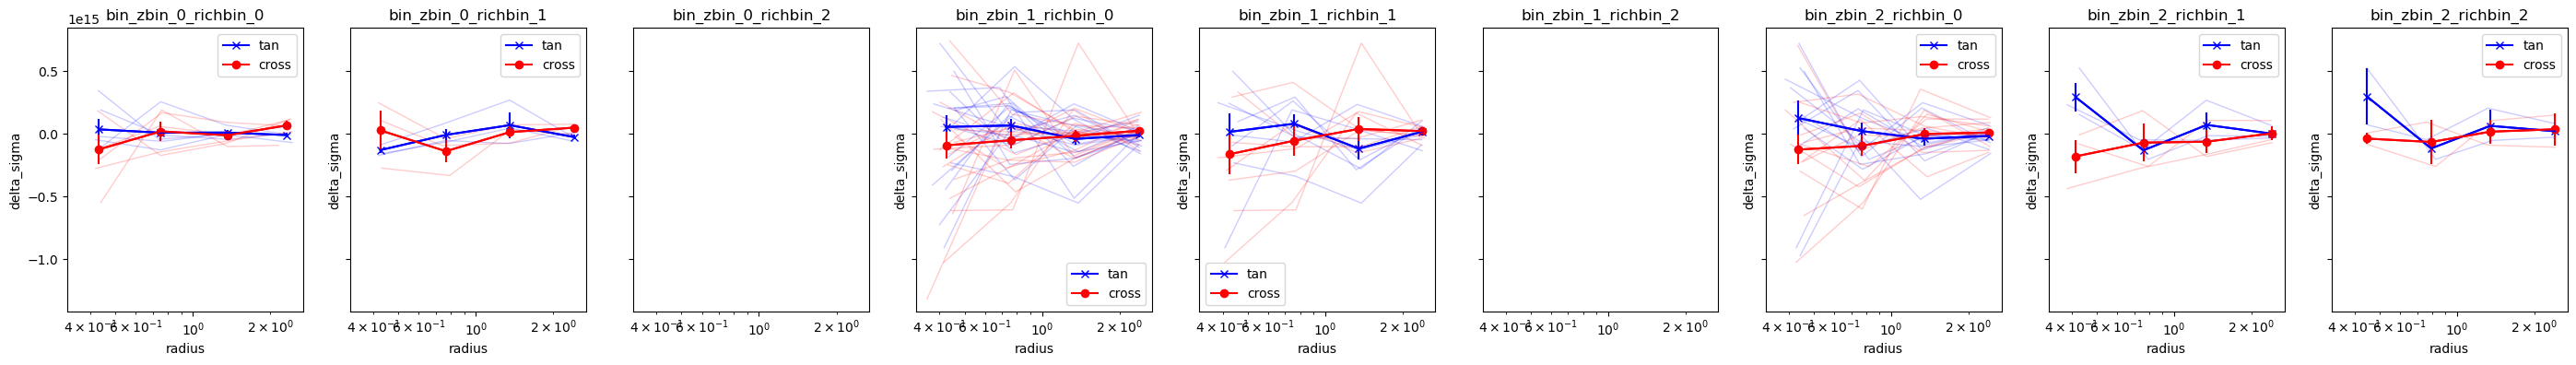

In [55]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0
ax1=axs[0]
for k in data.keys():
    print(k)
    if data[k]!=None:
        plot_stacked_delta_sigma_profile(data[k], data[k].unique_id , ax=ax1)
    else :
         ax1.set_title(k)
        
    i=min(i+1, len(data.keys()) - 1)
    ax1=axs[0+i]  


### Plot covariance

bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_0_richbin_2
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_1_richbin_2
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1
bin_zbin_2_richbin_2


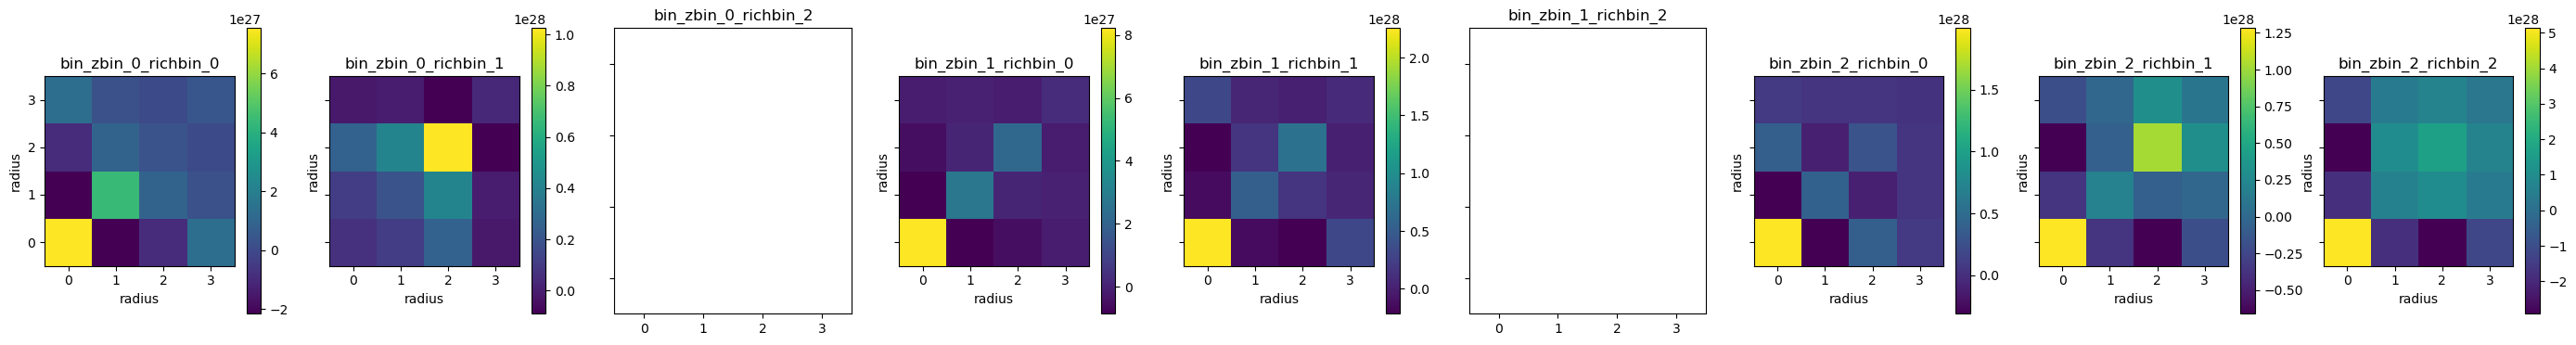

In [62]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0

ax2=axs[0]
for k in data.keys():
    print(k)
    if data[k]!=None:
        plot_covariance(data[k], cov_type='tan_sc', title = data[k].unique_id , ax=ax2)
    else :
         ax2.set_title(k)    
    i=min(i+1, len(data.keys()) - 1)
    ax2=axs[0+i]

# let's now use the pipeline approach

Here we will use the 1deg2, but we can also use the 20deg2 files (just need to change 20deg2 to 1deg2 in the name of the files)

### Launching a pipeline

Let's have a look at the submission script for this pipeline:
- to work at CCin2p3 we can use: `examples/cosmodc2/1deg2-in2p3.sub`:
- to work at NERSC we can use: `examples/cosmodc2/1deg2-nersc.sub`:

If we use the CCin2p3 example :

In [31]:
! cat examples/cosmodc2/1deg2-in2p3.sub

#!/usr/bin/bash
#SBATCH --time=01:00:00
#SBATCH --partition=hpc
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mem=128000

source /pbs/throng/lsst/users/jzuntz/txpipe-environments/setup-txpipe
ceci examples/cosmodc2/pipeline-1deg2-CL-in2p3.yml


If we use the NERSC example:

In [32]:
! cat examples/cosmodc2/1deg2-nersc.sub

#!/bin/bash
#SBATCH -A m1727
#SBATCH -C cpu
#SBATCH --qos=debug
#SBATCH --time=00:30:00
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=32

source $CFS/lsst/groups/WL/users/zuntz/setup-txpipe
tx ceci examples/cosmodc2/pipeline-1deg2-CL-nersc.yml


### This will launch a job of up to one hour (it should finish in 30 min) on a single CC-IN2P3 node to run a pipeline. After the first run, the output files are created and following runs take much less time.

In a terminal, **navigate to your TXPipe directory on IN2P3 and run**:

```
sbatch examples/cosmodc2/1deg2-in2p3.sub
```
to set it running.

If you are **on NERSC, you will instead run**:
```
sbatch examples/cosmodc2/1deg2-nersc.sub
```

Below, you will need to select the appropriate yaml file to comment/uncomment for `pipeline_file`, depending on if you are in IN2P3 or on NERSC.  

Let's look at the pipeline_file :

In [33]:
! cat examples/cosmodc2/pipeline-1deg2-CL-in2p3.yml

#this step depends on where you run
#for CCin2p3
site:
    name: cc-parallel
    mpi_command: "mpirun -n"

#for NERSC
#site:
#    name: cori-batch
#    image: ghcr.io/lsstdesc/txpipe-dev


#all the following steps should not depend on where you run 
launcher:
    name: mini
    interval: 3.0
     
modules: >
    txpipe
    rail.estimation.algos.bpz_lite

python_paths: []

stages:
#    - name: TXSourceSelectorMetadetect
#      nprocess: 1
#    - name: Inform_BPZ_lite
#      nprocess: 1
#    - name: BPZ_lite
#      nprocess: 1
    - name: CLClusterBinningRedshiftRichness
      nprocess: 1
    - name: CLClusterShearCatalogs
      nprocess: 1
    - name: CLClusterEnsembleProfiles
      nprocess: 1
#    - name: CLClusterDataVector
#      nprocess: 1



output_dir: ./data/cosmodc2/outputs-1deg2-CL
config: examples/cosmodc2/config-1deg2-CL.yml

inputs:
    # See README for paths to download these files
    shear_catalog:  ./data/example/inputs/metadetect_shear_catalog.hdf5
    #photometry_cat

In [72]:
# Read the appropriate pipeline configuration, and ask for a flow-chart.
pipeline_file = "examples/cosmodc2/pipeline-20deg2-CL-in2p3.yml"
#pipeline_file = "examples/cosmodc2/pipeline-1deg2-CL-nersc.yml"
flowchart_file = "CL_pipeline.png"


pipeline_config = ceci.Pipeline.build_config(
    pipeline_file,
    flow_chart=flowchart_file,
    dry_run=True
)

# Run the flow-chart pipeline
ceci.run_pipeline(pipeline_config)

0

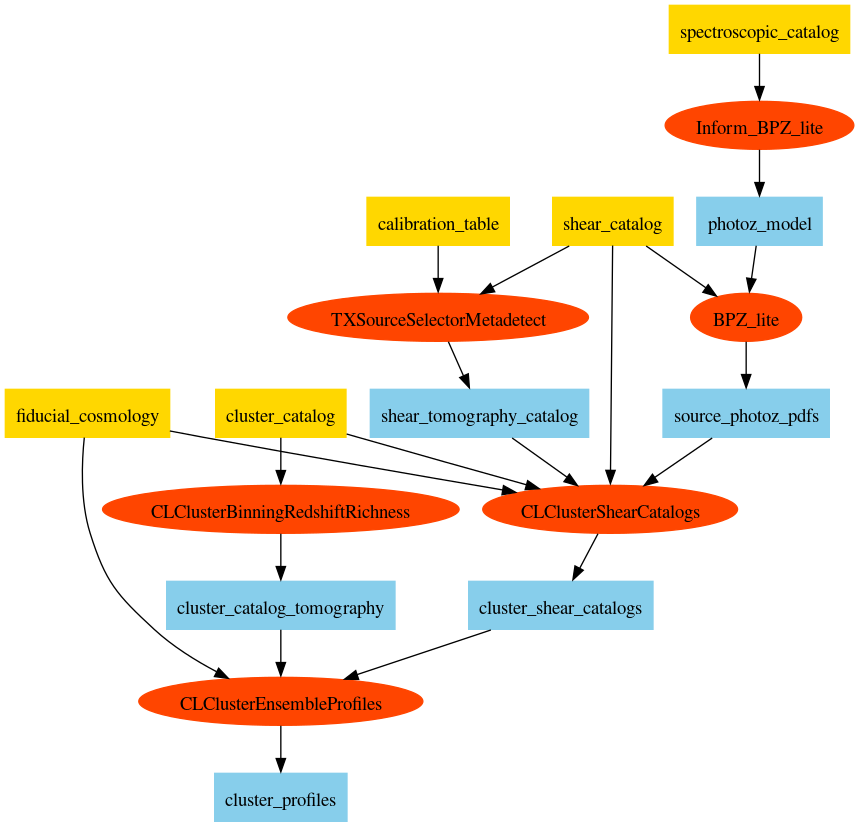

In [73]:
Image(flowchart_file)

In [78]:
with open(pipeline_file, 'r') as file:
    pipeline_content = yaml.safe_load(file)


In [82]:
filename_out =pipeline_content['output_dir']+"/cluster_profiles.pkl"

In [83]:
filename_out

'./data/cosmodc2/outputs-20deg2-CL/cluster_profiles.pkl'

In [84]:
data = pkl.load(open(filename_out,"rb"))

bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_0_richbin_2
bin_zbin_0_richbin_3
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_1_richbin_2
bin_zbin_1_richbin_3
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1
bin_zbin_2_richbin_2
bin_zbin_2_richbin_3


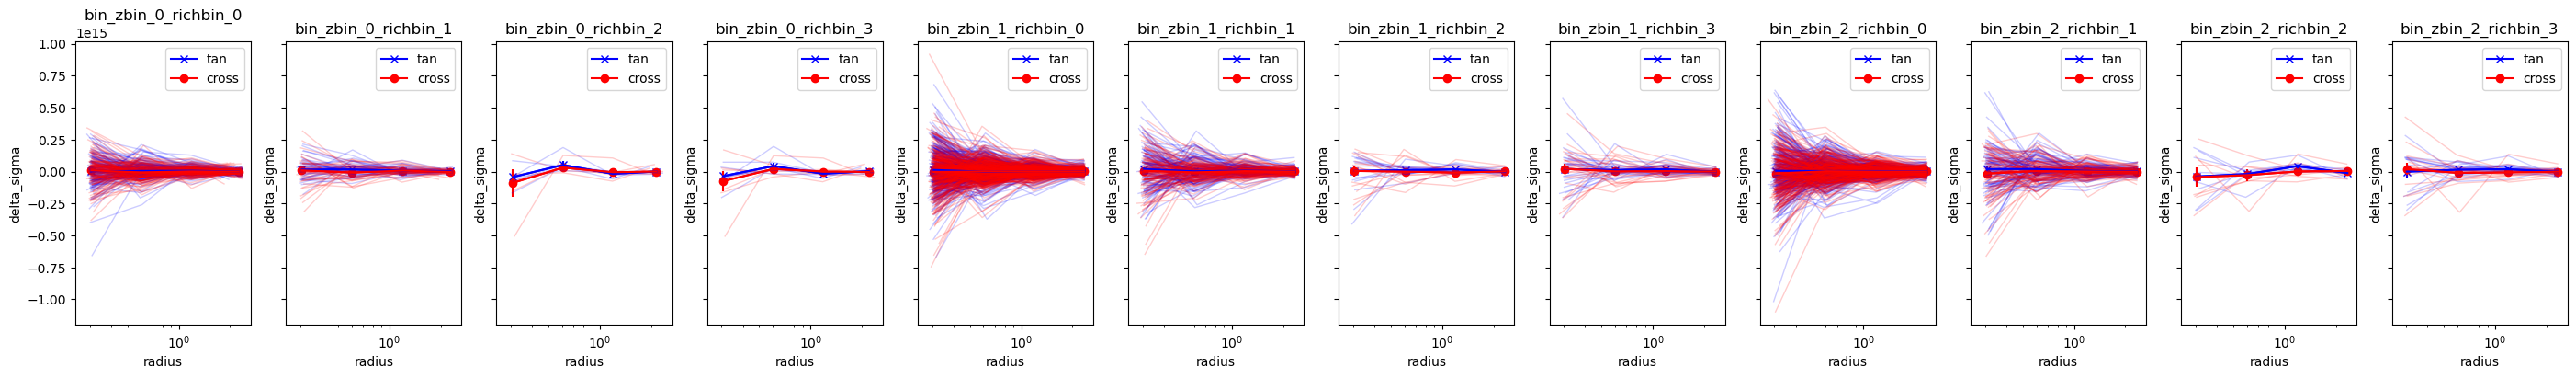

In [85]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0
ax=axs[0]
for k in data.keys():
    print(k)
    if data[k]!=None:
        plot_stacked_delta_sigma_profile(data[k], data[k].unique_id , ax=ax)
    else :
         ax.set_title(k)
        
    i=min(i+1, len(data.keys()) - 1)
    ax=axs[0+i]


bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_0_richbin_2
bin_zbin_0_richbin_3
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_1_richbin_2
bin_zbin_1_richbin_3
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1
bin_zbin_2_richbin_2
bin_zbin_2_richbin_3


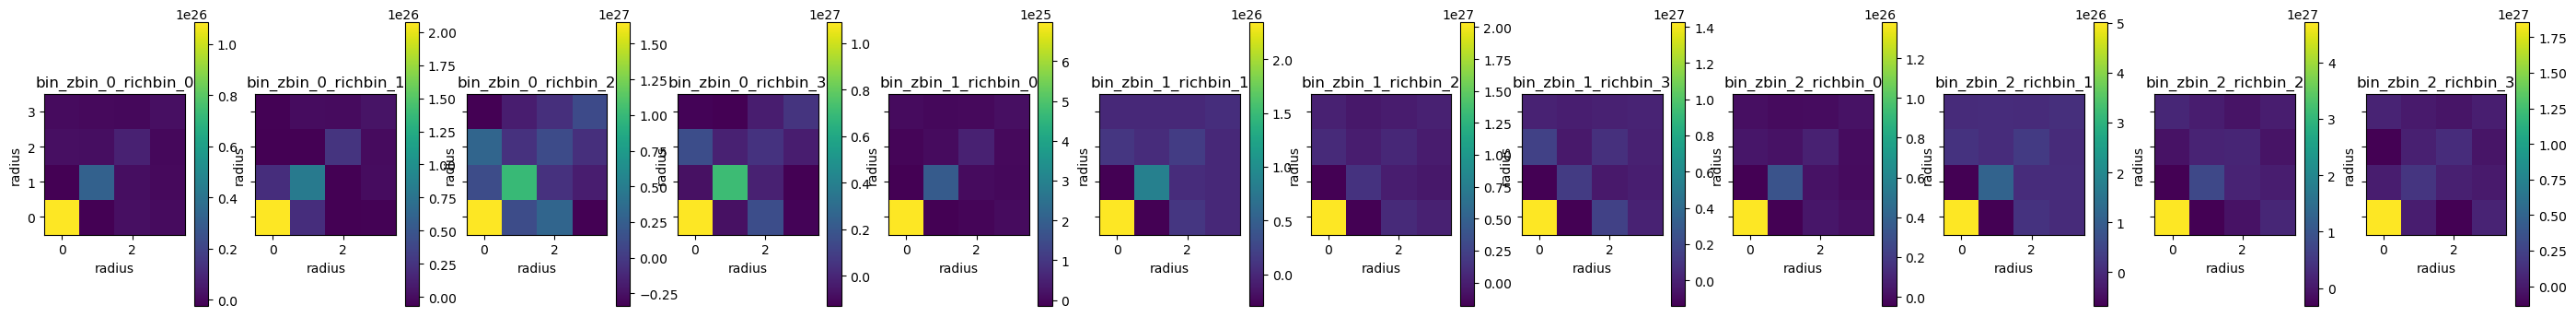

In [86]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0

ax2=axs[0]
for k in data.keys():
    print(k)
    if data[k]!=None:
        plot_covariance(data[k], cov_type='tan_sc', title = data[k].unique_id , ax=ax2)
    else :
         ax2.set_title(k)    
    i=min(i+1, len(data.keys()) - 1)
    ax2=axs[0+i]

In [89]:
with open(yaml.safe_load(pipeline_content['config']), 'r') as file:
    config_content = yaml.safe_load(file)

In [90]:
config_bin_info = config_content['CLClusterBinningRedshiftRichness']

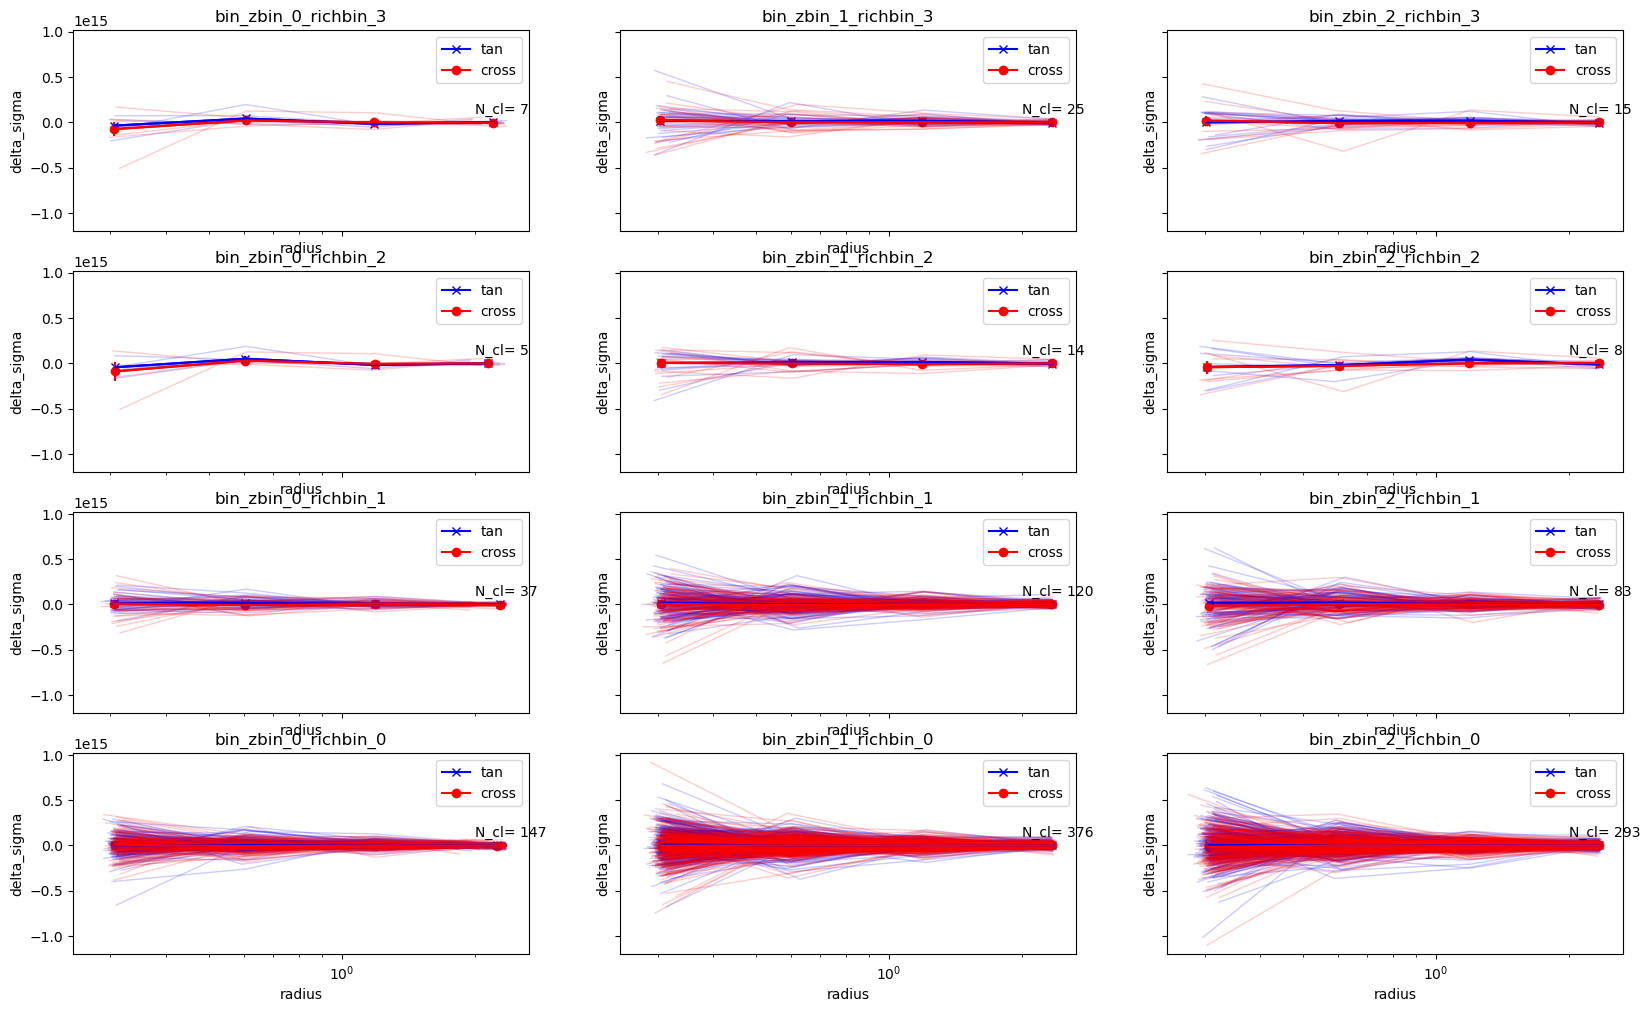

In [128]:
fig, axs = plt.subplots(len(config_bin_info['richedge'])-1, len(config_bin_info['zedge'])-1, sharex=True, sharey=True, figsize=(20, 12))

for i in range(len(config_bin_info['zedge'])-1):
    for j in range(len(config_bin_info['richedge'])-1):
        bin_name='bin_zbin_'+str(i)+'_richbin_'+str(j)
        if data[bin_name]!=None:
            plot_stacked_delta_sigma_profile(data[bin_name], data[bin_name].unique_id , ax=axs[len(config_bin_info['richedge']) -2 -j,i])
        else :
            axs[len(config_bin_info['richedge']) -2 -j,i].set_title(bin_name)      
            
        axs[len(config_bin_info['richedge']) -2 -j,i].text(2, 1e14, 'N_cl= '+ str(len(data[bin_name].data)))  
